## Group Project
### Brandon Carp, Shyan DasMadan, Sam Gunther, Prafulla Ranjan Dash

As a journalism department, our task is to provide insights into why certain foreign labor cases are __denied__ and provide recommendations on what to avoid when applying in easy to understand visualizations as well as other forms of consumption.

In [1]:
import pandas as pd

df = pd.read_excel("PERM_FY2020_Q3.xlsx")

# filter case statuses that are not withdrawn as including them could lead to misleading insights
df = df[df.CASE_STATUS != 'Withdrawn']

# create binary variables between cases that are denied vs certified
# denied cases will have a binary variable of 1 while certified cases will have a binary variable of 0
case_status = []
case_status_binary = []
for i in df.CASE_STATUS:
    if i == 'Denied':
        case_status.append('Denied')
        case_status_binary.append(1)
    else:
        case_status.append('Certified')
        case_status_binary.append(0)
        
df['CASE_STATUS'] = case_status
df['CASE_STATUS_BINARY'] = case_status_binary

df.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,ORIG_FILE_DATE,PREVIOUS_SWA_CASE_NUMBER_STATE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FOREIGN_WORKER_EXP_WITH_EMPL,FOREIGN_WORKER_EMPL_PAY_FOR_ED,FOREIGN_WORKER_CURR_EMPLOYED,EMPLOYER_COMPLETED_APPLICATION,PREPARER_NAME,PREPARER_TITLE,PREPARER_EMAIL,EMP_INFO_DECL_NAME,EMP_INFO_DECL_TITLE,CASE_STATUS_BINARY
0,A-09245-62715,Denied,2009-09-03,2020-04-30 14:50:29,N,NaT,NaN,N,SATURN ENTERPRISES INC,2340 N WASHTENAW AVE,...,N,N,N,N,Christopher E Kurczaba,Attorney,kurczabalaw@sbcglobal.net,Zygmunt Oparowski,President,1
1,A-10119-96737,Certified,2010-03-29,2019-10-18 11:34:37,Y,2000-09-15,MARYLAND,N,FIL PARONG,13528 JAMIESON PL,...,N,N,N,N,WINSTON W TSAI,ATTORNEY AT LAW,WINSTONTSAI@AOL.COM,FIL PARONG,HEAD OF HOUSEHOLD,0
2,A-10225-13679,Denied,2010-08-10,2020-04-30 07:55:08,N,NaT,NaN,N,GLENNS PLUMBING SERVICES,854 CUSTER STREET,...,N,N,N,N,DANIEL J SULLIVAN,ATTORNEY,GWG8@AOL.COM,DAVID GLENN,OWNER,1
3,A-11033-51540,Certified,2011-02-03,2020-05-28 08:38:56,N,NaT,NaN,N,SKILLNET SOLUTIONS INC.,1901 SOUTH BASCOM AVENUE,...,N,N,Y,N,Sonal Kinger,Attorney at Law,sonal.kinger@bakerlawcorp.com,Jack Grover,VP of Finance and Operations,0
4,A-11074-62984,Denied,2011-03-10,2020-06-17 07:50:52,N,NaT,NaN,N,"R L CONSTRUCTION, INC.",904 NEPPERHAN AVENUE,...,N,N,N,N,DENISE S DUTTON,NONATTORNEY,NaN,RITA O SULLIVAN,MANAGER,1


In [2]:
# total number of rows and columns
print('Number of Rows:', df.shape[0])
print('Number of Columns:', df.shape[1])

n = df.shape[0]
n_cert = df[df.CASE_STATUS=='Certified'].shape[0]
print('Number of Certified Cases: ' + str(n_cert))
n_den = df[df.CASE_STATUS=='Denied'].shape[0]
print('Number of Denied Cases: ' + str(n_den))

Number of Rows: 69117
Number of Columns: 155
Number of Certified Cases: 66235
Number of Denied Cases: 2882


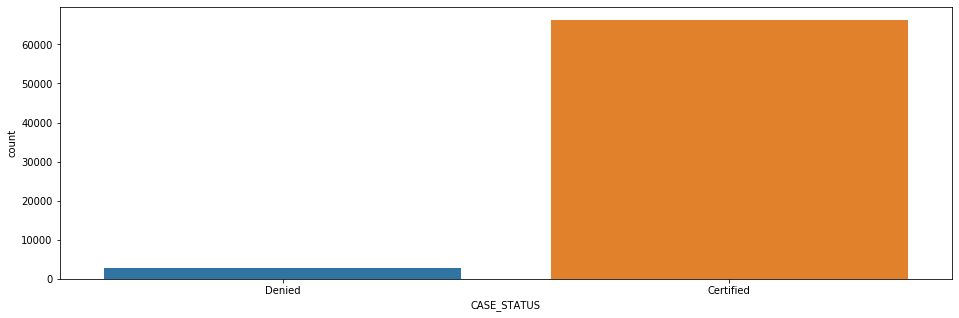

In [3]:
# total number of cases binned by case status bucket
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 5)
sns.countplot(x = 'CASE_STATUS', data = df)

In [4]:
# check to see if there are disparate relationships between case statuses and the type of building an employer works in
df['BUILDING_BOOL'] = pd.isna(df.loc[:, ('EMPLOYER_ADDRESS_2')])
df.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,ORIG_FILE_DATE,PREVIOUS_SWA_CASE_NUMBER_STATE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FOREIGN_WORKER_EMPL_PAY_FOR_ED,FOREIGN_WORKER_CURR_EMPLOYED,EMPLOYER_COMPLETED_APPLICATION,PREPARER_NAME,PREPARER_TITLE,PREPARER_EMAIL,EMP_INFO_DECL_NAME,EMP_INFO_DECL_TITLE,CASE_STATUS_BINARY,BUILDING_BOOL
0,A-09245-62715,Denied,2009-09-03,2020-04-30 14:50:29,N,NaT,NaN,N,SATURN ENTERPRISES INC,2340 N WASHTENAW AVE,...,N,N,N,Christopher E Kurczaba,Attorney,kurczabalaw@sbcglobal.net,Zygmunt Oparowski,President,1,True
1,A-10119-96737,Certified,2010-03-29,2019-10-18 11:34:37,Y,2000-09-15,MARYLAND,N,FIL PARONG,13528 JAMIESON PL,...,N,N,N,WINSTON W TSAI,ATTORNEY AT LAW,WINSTONTSAI@AOL.COM,FIL PARONG,HEAD OF HOUSEHOLD,0,True
2,A-10225-13679,Denied,2010-08-10,2020-04-30 07:55:08,N,NaT,NaN,N,GLENNS PLUMBING SERVICES,854 CUSTER STREET,...,N,N,N,DANIEL J SULLIVAN,ATTORNEY,GWG8@AOL.COM,DAVID GLENN,OWNER,1,True
3,A-11033-51540,Certified,2011-02-03,2020-05-28 08:38:56,N,NaT,NaN,N,SKILLNET SOLUTIONS INC.,1901 SOUTH BASCOM AVENUE,...,N,Y,N,Sonal Kinger,Attorney at Law,sonal.kinger@bakerlawcorp.com,Jack Grover,VP of Finance and Operations,0,False
4,A-11074-62984,Denied,2011-03-10,2020-06-17 07:50:52,N,NaT,NaN,N,"R L CONSTRUCTION, INC.",904 NEPPERHAN AVENUE,...,N,N,N,DENISE S DUTTON,NONATTORNEY,NaN,RITA O SULLIVAN,MANAGER,1,True


Orange Bars represent case #'s in which come from buildings of employment with a Suite/Apartment Number.


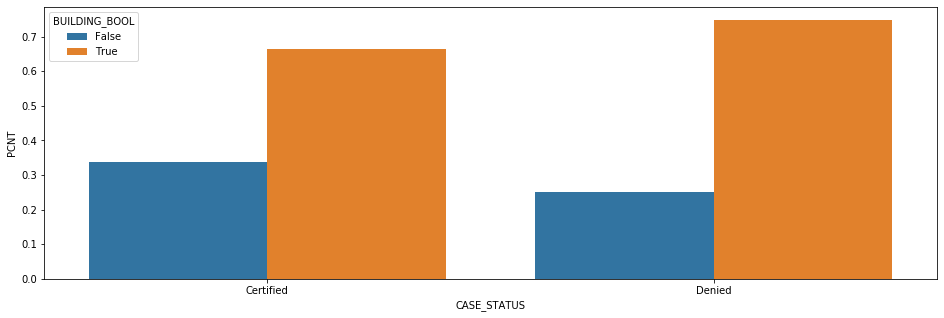

In [5]:
df_building_bool = df[['BUILDING_BOOL', 'CASE_STATUS',
                       'CASE_NUMBER']].groupby(['CASE_STATUS','BUILDING_BOOL']).agg('count').reset_index()

df_building_bool_total = df[['CASE_STATUS','CASE_NUMBER']].groupby(['CASE_STATUS']).agg('count').reset_index()
df_building_bool_total.head()

df_temp = df_building_bool.merge(df_building_bool_total, on = 'CASE_STATUS').rename(columns={'CASE_NUMBER_x':'COUNT',
                                                                                    'CASE_NUMBER_y':'TOTAL'})
df_temp['PCNT'] = df_temp.COUNT / df_temp.TOTAL
df_temp

print("Orange Bars represent case #'s in which come from buildings of employment with a Suite/Apartment Number.")
sns.barplot(x = 'CASE_STATUS', y = 'PCNT', hue = 'BUILDING_BOOL', data = df_temp)

In [6]:
state_list = []
list1 = ['ALABAMA','ALASKA','ARIZONA','ARKANSAS','CALIFORNIA','COLORADO','CONNECTICUT','DELAWARE','FLORIDA','GEORGIA',
        'HAWAII','IDAHO','ILLINOIS','INDIANA','IOWA','KANSAS','KENTUCKY','LOUISIANA','MAINE','MARYLAND',
        'MASSACHUSETTS','MICHIGAN','MINNESOTA','MISSISSIPPI','MISSOURI','MONTANA','NEBRASKA','NEVADA','NEW HAMPSHIRE',
        'NEW JERSEY','NEW MEXICO','NEW YORK','NORTH CAROLINA','NORTH DAKOTA','OHIO','OKLAHOMA','OREGON',
        'PENNSYLVANIA','RHODE ISLAND','SOUTH CAROLINA','SOUTH DAKOTA','TENNESSEE','TEXAS','UTAH','VERMONT','VIRGINIA',
         'WASHINGTON','WEST VIRGINIA','WISCONSIN','WYOMING', 'DISTRICT OF COLUMBIA','GUAM','NORTHERN MARIANA ISLANDS',
        'PUERTO RICO']
list2 = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA',
         'MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN',
         'TX','UT','VT','VA','WA','WV','WI','WY', 'DC','GU','MP','PR']

for i in df.EMPLOYER_STATE_PROVINCE:
    word = str(i).upper().strip()
    if any(j in word for j in list1) or any(j == word for j in list2):
        for j in range(0,len(list1)):
            if list1[j] in word or list2[j] == word:
                state_list.append(list1[j])
                break
    else:
        state_list.append(word)
        
df['EMP_STATE'] = state_list

pd.set_option('display.max_rows', None)
df_temp = df[['CASE_STATUS','EMP_STATE',
    'CASE_NUMBER']].groupby(['CASE_STATUS','EMP_STATE']).agg('count').reset_index()

Certified Cases by Employer State


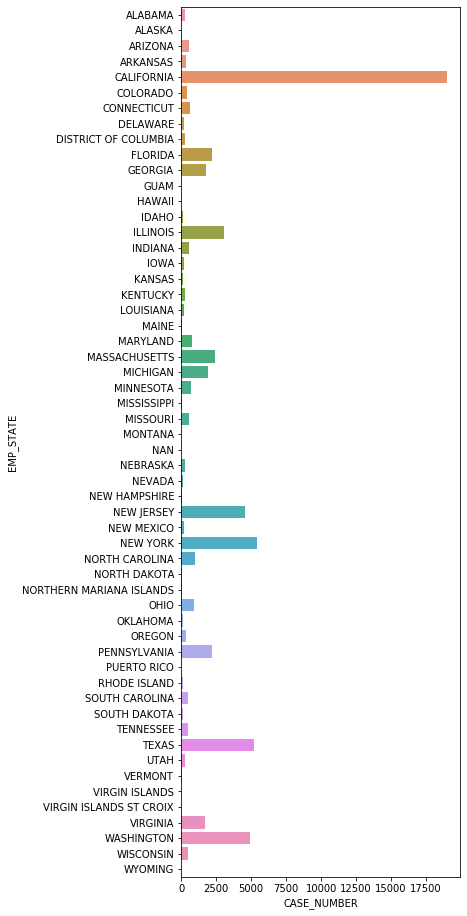

In [7]:
plt.rcParams['figure.figsize'] = (5, 16)
print('Certified Cases by Employer State')
ax = sns.barplot(data = df_temp[df_temp.CASE_STATUS == 'Certified'],
            x = 'CASE_NUMBER',y = 'EMP_STATE')

Denied Cases by Employer State


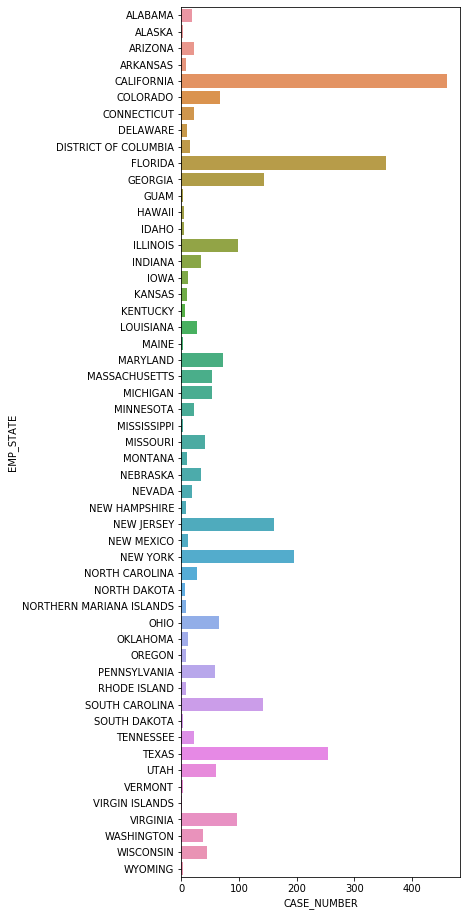

In [8]:
plt.rcParams['figure.figsize'] = (5, 16)
print('Denied Cases by Employer State')
ax = sns.barplot(data = df_temp[df_temp.CASE_STATUS == 'Denied'],
            x = 'CASE_NUMBER',y = 'EMP_STATE')

In [9]:
df_temp = df[['CASE_STATUS','EMPLOYER_NAME',
    'CASE_NUMBER']].groupby(['CASE_STATUS','EMPLOYER_NAME']).agg('count').reset_index()

df_temp['EMPLOYER_NAME'] = [i.upper() for i in df_temp.EMPLOYER_NAME]
df_temp_cert = df_temp[df_temp.CASE_STATUS == 'Certified'][['EMPLOYER_NAME','CASE_NUMBER']]
df_temp_den = df_temp[df_temp.CASE_STATUS == 'Denied'][['EMPLOYER_NAME','CASE_NUMBER']]

df_temp = df_temp_cert.merge(df_temp_den, how = 'outer', on = 'EMPLOYER_NAME')
df_temp.rename(columns={'CASE_NUMBER_x':'TOTAL_CERTIFIED','CASE_NUMBER_y':'TOTAL_DENIED'}, inplace=True)
df_temp['TOTAL_CERTIFIED'] = df_temp['TOTAL_CERTIFIED'].fillna(0)
df_temp['TOTAL_DENIED'] = df_temp['TOTAL_DENIED'].fillna(0)
df_temp['TOTAL_CERTIFIED_PCNT'] = df_temp['TOTAL_CERTIFIED'] / n
df_temp['TOTAL_DENIED_PCNT'] = df_temp['TOTAL_DENIED'] / n

In [10]:
n_den

2882

In [11]:
df_temp.head()

,EMPLOYER_NAME,TOTAL_CERTIFIED,TOTAL_DENIED,TOTAL_CERTIFIED_PCNT,TOTAL_DENIED_PCNT
0,100 BROAD STREET LLC DBA ESSEN,1.0,0.0,0.000014,0.0
1,100S SEAFOOD BUFFET INC.,1.0,0.0,0.000014,0.0
2,"101DOMAIN, INC.",1.0,0.0,0.000014,0.0
3,"10X GENOMICS, INC.",2.0,0.0,0.000029,0.0
4,10TH AVENUE GROUP INC,1.0,0.0,0.000014,0.0


Highlight at companies who get cases certified with at least 10 total cases


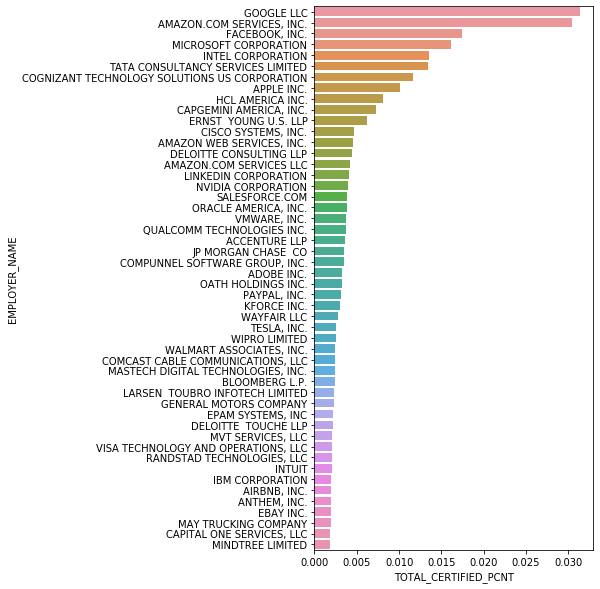

In [12]:
print('Highlight at companies who get cases certified with at least 10 total cases')
plt.rcParams['figure.figsize'] = (5, 10)
df_temp = df_temp.sort_values(by=['TOTAL_CERTIFIED_PCNT'], ascending = False)[:50]

ax = sns.barplot(data = df_temp,
            x = 'TOTAL_CERTIFIED_PCNT',y = 'EMPLOYER_NAME')

Highlight at companies who get cases denied with at least 10 total cases


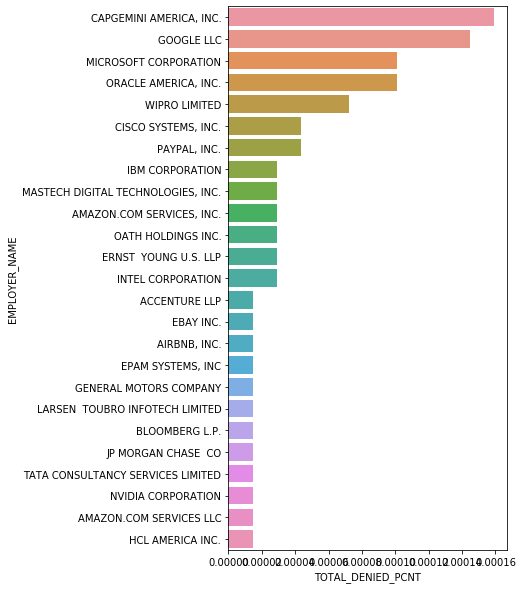

In [13]:
print('Highlight at companies who get cases denied with at least 10 total cases')
df_temp = df_temp.sort_values(by=['TOTAL_DENIED_PCNT'], ascending = False)[:50]

ax = sns.barplot(data = df_temp[df_temp.TOTAL_DENIED_PCNT >= 0.00000001] ,
            x = 'TOTAL_DENIED_PCNT',y = 'EMPLOYER_NAME')

In [14]:
cert_num_employee = df[df.CASE_STATUS == 'Certified']['EMPLOYER_NUM_EMPLOYEES']
print("Median # of Employees for all Certified Cases: "
      +str(cert_num_employee.median()))
print("Mean # of Employees for all Certified Cases: "
      +str(cert_num_employee.mean())+'\n')
print(cert_num_employee.describe())

den_num_employee = df[df.CASE_STATUS == 'Denied']['EMPLOYER_NUM_EMPLOYEES']
print("\nMedian # of Employees for all Denied Cases: "
      +str(den_num_employee.median()))
print("Mean # of Employees for all Denied Cases: "
      +str(den_num_employee.mean()))
print(den_num_employee.describe())

Median # of Employees for all Certified Cases: 2500.0
Mean # of Employees for all Certified Cases: 48356.473880484344

count    6.623400e+04
mean     4.835647e+04
std      1.618262e+05
min      0.000000e+00
25%      1.350000e+02
50%      2.500000e+03
75%      3.039475e+04
max      2.072251e+07
Name: EMPLOYER_NUM_EMPLOYEES, dtype: float64

Median # of Employees for all Denied Cases: 56.0
Mean # of Employees for all Denied Cases: 4559.195198329854
count      2874.000000
mean       4559.195198
std       29895.298659
min           0.000000
25%          10.000000
50%          56.000000
75%         564.000000
max      647500.000000
Name: EMPLOYER_NUM_EMPLOYEES, dtype: float64


/Users/shyandasmadan/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/shyandasmadan/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Histogram of Employer Employee Counts for Certified Cases')

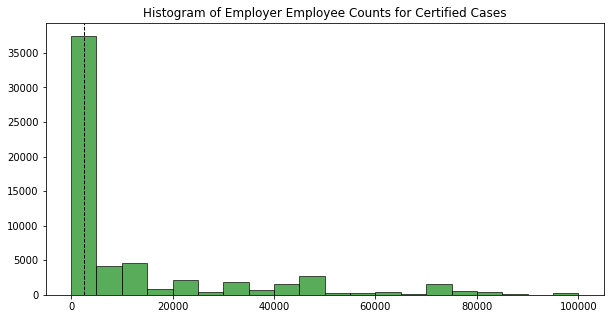

In [15]:
# Plot histogram without influencing outliers
plt.rcParams['figure.figsize'] = (10, 5)
plt.hist(cert_num_employee, bins=20, range=[0,100000], color='green', edgecolor='k', alpha=0.65)
plt.axvline(cert_num_employee.median(), color='k', linestyle='dashed', linewidth=1)
plt.title("Histogram of Employer Employee Counts for Certified Cases")

Text(0.5, 1.0, 'Histogram of Employer Employee Counts for Denied Cases')

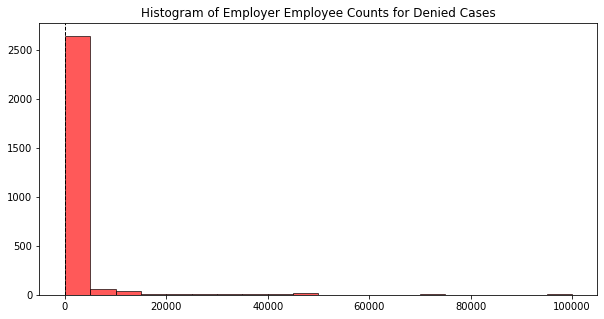

In [16]:
# Plot histogram without influencing outliers
plt.hist(den_num_employee, bins=20, range=[0,100000], color='red', edgecolor='k', alpha=0.65)
plt.axvline(den_num_employee.median(), color='k', linestyle='dashed', linewidth=1)
plt.title("Histogram of Employer Employee Counts for Denied Cases")

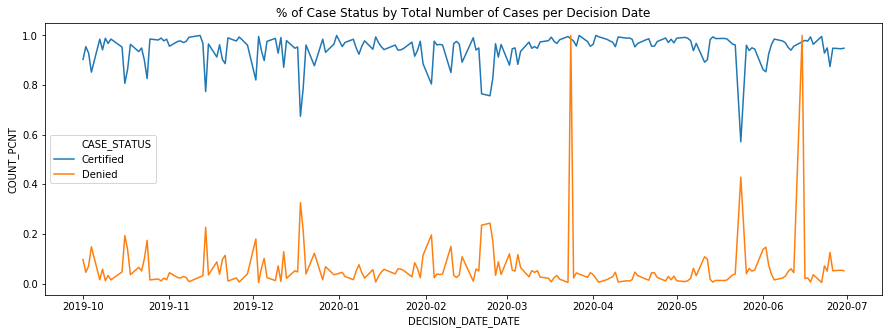

In [17]:
import datetime
df['DECISION_DATE_DATE'] = [i.date() for i in df.DECISION_DATE]

df_temp = df[['CASE_STATUS','DECISION_DATE_DATE',
    'CASE_NUMBER']].groupby(['CASE_STATUS','DECISION_DATE_DATE']).agg('count').reset_index()
df_total = df[['DECISION_DATE_DATE',
    'CASE_NUMBER']].groupby(['DECISION_DATE_DATE']).agg('count').reset_index()

df_temp = df_temp.merge(df_total,on='DECISION_DATE_DATE').rename(columns={'CASE_NUMBER_x':'COUNT',
                                                                      'CASE_NUMBER_y':'TOTAL'})
df_temp['COUNT_PCNT'] = df_temp['COUNT'] / df_temp['TOTAL']

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('% of Case Status by Total Number of Cases per Decision Date')
sns.lineplot(x = 'DECISION_DATE_DATE', y = 'COUNT_PCNT', hue = 'CASE_STATUS', data = df_temp )

In [18]:
cert_year_business = df[df.CASE_STATUS == 'Certified']['EMPLOYER_YEAR_COMMENCED_BUSINESS']
print("Median Year of Business for all Certified Cases: "
      +str(cert_year_business.median()))
print("Mean Year of Business for all Certified Cases: "
      +str(cert_year_business.mean())+'\n')
print(cert_year_business.describe())

den_year_business = df[df.CASE_STATUS == 'Denied']['EMPLOYER_YEAR_COMMENCED_BUSINESS']
print("\nMedian Year of Business for all Denied Cases: "
      +str(den_year_business.median()))
print("Mean Year of Business for all Denied Cases: "
      +str(den_year_business.mean()))
print(den_year_business.describe())

Median Year of Business for all Certified Cases: 1998.0
Mean Year of Business for all Certified Cases: 1985.9523320599737

count    66229.000000
mean      1985.952332
std         35.761102
min       1193.000000
25%       1980.000000
50%       1998.000000
75%       2006.000000
max       2019.000000
Name: EMPLOYER_YEAR_COMMENCED_BUSINESS, dtype: float64

Median Year of Business for all Denied Cases: 2003.0
Mean Year of Business for all Denied Cases: 1994.1583362460678
count    2861.000000
mean     1994.158336
std        29.034000
min      1766.000000
25%      1989.000000
50%      2003.000000
75%      2011.000000
max      2019.000000
Name: EMPLOYER_YEAR_COMMENCED_BUSINESS, dtype: float64


/Users/shyandasmadan/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/shyandasmadan/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Start of Year of Business for Certified Cases')

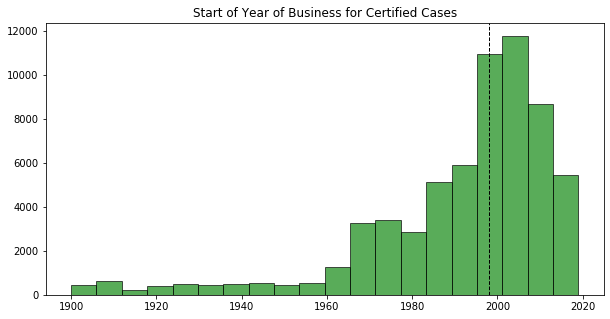

In [19]:
# Plot histogram without influencing outliers
plt.rcParams['figure.figsize'] = (10, 5)
plt.hist(cert_year_business, bins=20, range=[1900,2019], color='green', edgecolor='k', alpha=0.65)
plt.axvline(cert_year_business.median(), color='k', linestyle='dashed', linewidth=1)
plt.title("Start of Year of Business for Certified Cases")

Text(0.5, 1.0, 'Start of Year of Business for Denied Cases')

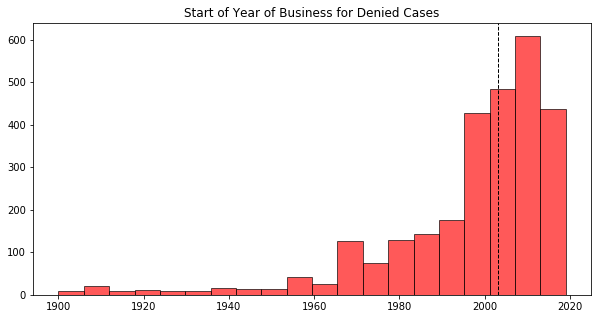

In [20]:
# Plot histogram without influencing outliers
plt.rcParams['figure.figsize'] = (10, 5)
plt.hist(den_year_business, bins=20, range=[1900,2019], color='red', edgecolor='k', alpha=0.65)
plt.axvline(den_year_business.median(), color='k', linestyle='dashed', linewidth=1)
plt.title("Start of Year of Business for Denied Cases")

Median Time Difference for all Certified Cases: 133.0
Mean Time Difference for all Certified Cases: 148.1160262700989

count    66235.000000
mean       148.116026
std         91.476564
min         14.000000
25%        115.000000
50%        133.000000
75%        149.000000
max       3490.000000
Name: TIME_DIFF, dtype: float64


Text(0.5, 1.0, 'Time Difference Histogram Between Receieved and Decision Date for Certified Cases')

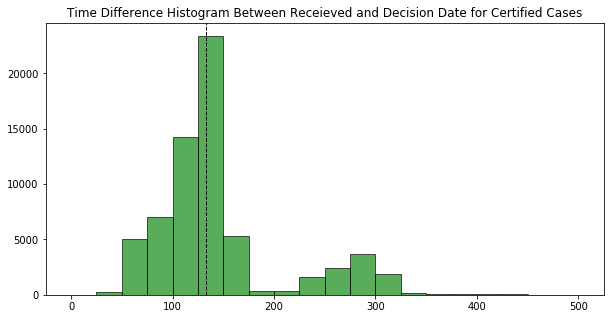

In [21]:
df['RECEIEVED_DATE_DATE'] = [i.date() for i in df.RECEIVED_DATE]
df['TIME_DIFF'] = df['DECISION_DATE_DATE'] - df['RECEIEVED_DATE_DATE']
df['TIME_DIFF'] = [i.days for i in df.TIME_DIFF]

# Plot histogram without influencing outliers
cert_time_diff = df[df.CASE_STATUS == 'Certified']['TIME_DIFF']
print("Median Time Difference for all Certified Cases: "
      +str(cert_time_diff.median()))
print("Mean Time Difference for all Certified Cases: "
      +str(cert_time_diff.mean())+'\n')
print(cert_time_diff.describe())

plt.rcParams['figure.figsize'] = (10, 5)
plt.hist(cert_time_diff, bins=20, range=[0,500], color='green', edgecolor='k', alpha=0.65)
plt.axvline(cert_time_diff.median(), color='k', linestyle='dashed', linewidth=1)
plt.title("Time Difference Histogram Between Receieved and Decision Date for Certified Cases")

Median Time Difference for all Denied Cases: 267.0
Mean Time Difference for all Denied Cases: 309.3108952116586

count    2882.000000
mean      309.310895
std       354.994507
min        48.000000
25%       150.000000
50%       267.000000
75%       310.000000
max      3892.000000
Name: TIME_DIFF, dtype: float64


Text(0.5, 1.0, 'Time Difference Histogram Between Receieved and Decision Date for Denied Cases')

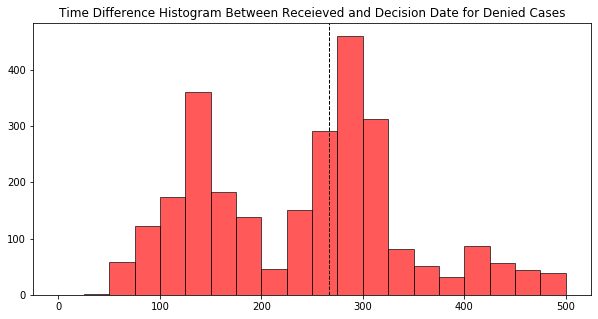

In [22]:
# Plot histogram without influencing outliers
den_time_diff = df[df.CASE_STATUS == 'Denied']['TIME_DIFF']
print("Median Time Difference for all Denied Cases: "
      +str(den_time_diff.median()))
print("Mean Time Difference for all Denied Cases: "
      +str(den_time_diff.mean())+'\n')
print(den_time_diff.describe())

# Plot histogram without influencing outliers
den_time_diff = df[df.CASE_STATUS == 'Denied']['TIME_DIFF']
plt.rcParams['figure.figsize'] = (10, 5)
plt.hist(den_time_diff, bins=20, range=[0,500], color='red', edgecolor='k', alpha=0.65)
plt.axvline(den_time_diff.median(), color='k', linestyle='dashed', linewidth=1)
plt.title("Time Difference Histogram Between Receieved and Decision Date for Denied Cases")